**DOMAIN:** Industrial safety. NLP based Chatbot.


**CONTEXT:**
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.


**DATA DESCRIPTION:**
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.

Columns description:

‣ *Data:* timestamp or time/date information

‣ *Countries:* which country the accident occurred (anonymised)

‣ *Local:* the city where the manufacturing plant is located (anonymised)

‣ *Industry sector:* which sector the plant belongs to

‣ *Accident level:* from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ *Potential Accident Level:* Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

‣ *Genre:* if the person is male of female

‣ *Employee or Third Party:* if the injured person is an employee or a third party

‣ *Critical Risk:* some description of the risk involved in the accident

‣ *Description:* Detailed description of how the accident happened.



Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

**PROJECT OBJECTIVE:**

Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description

**Milestone - 1**

**Input:** Context and Dataset

**Process:**

‣ Step 1: Import the data [ 3 points ]

‣ Step 2: Data cleansing [ 5 points ]

‣ Step 3: Data preprocessing (NLP Preprocessing techniques) [ 7 points ]

‣ Step 4: Data preparation - Cleansed data in .xlsx or .csv file [ 5 points ]

‣ Step 5: Design train and test basic machine learning classifiers [ 10 Points ]

‣ Step 6: Interim report [ 10 points ]

**Submission:** Interim report, Jupyter Notebook with all the steps in Milestone-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("Data+Set+-+industrial_safety_and_health_database_with_accidents_description.xlsx")

In [4]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [5]:
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
data.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [10]:
data.isnull().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

**Observations:**

No Missing Data is found in the database

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      425 non-null    datetime64[ns]
 1   Countries                 425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Genre                     425 non-null    object        
 7   Employee or Third Party   425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [12]:
data['Countries'].value_counts()

Countries
Country_01    251
Country_02    130
Country_03     44
Name: count, dtype: int64

In [13]:
data['Local'].value_counts()

Local
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64

In [21]:
data.groupby(['Countries', 'Local', 'Industry Sector']).count()

Data  Accident Level  \
Countries  Local    Industry Sector                         
Country_01 Local_01 Mining             57              57   
           Local_03 Mining             90              90   
           Local_04 Mining             56              56   
           Local_06 Metals             46              46   
           Local_11 Others              2               2   
Country_02 Local_02 Mining             24              24   
           Local_05 Metals             59              59   
           Local_07 Mining             14              14   
           Local_08 Metals             27              27   
           Local_09 Metals              2               2   
           Local_12 Others              4               4   
Country_03 Local_10 Others             44              44   

                                     Potential Accident Level  Genre  \
Countries  Local    Industry Sector                                    
Country_01 Local_01 Mining                                 57     57   
           Local_03 Mining                                 90     90   
           Local_04 Mining                                 56     56   
           Local_06 Metals                                 46     46   
           Local_11 Others                                  2      2   
Country_02 Local_02 Mining                                 24     24   
           Local_05 Metals                                 59     59   
           Local_07 Mining                                 14     14   
           Local_08 Metals                                 27     27   
           Local_09 Metals                                  2      2   
           Local_12 Others                                  4      4   
Country_03 Local_10 Others                                 44     44   

                                     Employee or Third Party  Critical Risk  \
Countries  Local    Industry Sector                                           
Country_01 Local_01 Mining                                57             57   
           Local_03 Mining                                90             90   
           Local_04 Mining                                56             56   
           Local_06 Metals                                46             46   
           Local_11 Others                                 2              2   
Country_02 Local_02 Mining                                24             24   
           Local_05 Metals                                59             59   
           Local_07 Mining                                14             14   
           Local_08 Metals                                27             27   
           Local_09 Metals                                 2              2   
           Local_12 Others                                 4              4   
Country_03 Local_10 Others                                44             44   

                                     Description  
Countries  Local    Industry Sector               
Country_01 Local_01 Mining                    57  
           Local_03 Mining                    90  
           Local_04 Mining                    56  
           Local_06 Metals                    46  
           Local_11 Others                     2  
Country_02 Local_02 Mining                    24  
           Local_05 Metals                    59  
           Local_07 Mining                    14  
           Local_08 Metals                    27  
           Local_09 Metals                     2  
           Local_12 Others                     4  
Country_03 Local_10 Others                    44

In [26]:
data.groupby(['Industry Sector', 'Genre']).count()

Data  Countries  Local  Accident Level  \
Industry Sector Genre                                            
Metals          Female    13         13     13              13   
                Male     121        121    121             121   
Mining          Female     5          5      5               5   
                Male     236        236    236             236   
Others          Female     4          4      4               4   
                Male      46         46     46              46   

                        Potential Accident Level  Employee or Third Party  \
Industry Sector Genre                                                       
Metals          Female                        13                       13   
                Male                         121                      121   
Mining          Female                         5                        5   
                Male                         236                      236   
Others          Female                         4                        4   
                Male                          46                       46   

                        Critical Risk  Description  
Industry Sector Genre                               
Metals          Female             13           13  
                Male              121          121  
Mining          Female              5            5  
                Male              236          236  
Others          Female              4            4  
                Male               46           46

In [28]:
data.groupby(['Genre','Accident Level']).count()

Data  Countries  Local  Industry Sector  \
Genre  Accident Level                                            
Female I                 18         18     18               18   
       II                 3          3      3                3   
       III                1          1      1                1   
Male   I                298        298    298              298   
       II                37         37     37               37   
       III               30         30     30               30   
       IV                30         30     30               30   
       V                  8          8      8                8   

                       Potential Accident Level  Employee or Third Party  \
Genre  Accident Level                                                      
Female I                                     18                       18   
       II                                     3                        3   
       III                                    1                        1   
Male   I                                    298                      298   
       II                                    37                       37   
       III                                   30                       30   
       IV                                    30                       30   
       V                                      8                        8   

                       Critical Risk  Description  
Genre  Accident Level                              
Female I                          18           18  
       II                          3            3  
       III                         1            1  
Male   I                         298          298  
       II                         37           37  
       III                        30           30  
       IV                         30           30  
       V                           8            8

In [30]:
data.groupby(['Industry Sector', 'Accident Level']).count()

Data  Countries  Local  \
Industry Sector Accident Level                           
Metals          I                107        107    107   
                II                12         12     12   
                III                7          7      7   
                IV                 7          7      7   
                V                  1          1      1   
Mining          I                167        167    167   
                II                26         26     26   
                III               20         20     20   
                IV                21         21     21   
                V                  7          7      7   
Others          I                 42         42     42   
                II                 2          2      2   
                III                4          4      4   
                IV                 2          2      2   

                                Potential Accident Level  Genre  \
Industry Sector Accident Level                                    
Metals          I                                    107    107   
                II                                    12     12   
                III                                    7      7   
                IV                                     7      7   
                V                                      1      1   
Mining          I                                    167    167   
                II                                    26     26   
                III                                   20     20   
                IV                                    21     21   
                V                                      7      7   
Others          I                                     42     42   
                II                                     2      2   
                III                                    4      4   
                IV                                     2      2   

                                Employee or Third Party  Critical Risk  \
Industry Sector Accident Level                                           
Metals          I                                   107            107   
                II                                   12             12   
                III                                   7              7   
                IV                                    7              7   
                V                                     1              1   
Mining          I                                   167            167   
                II                                   26             26   
                III                                  20             20   
                IV                                   21             21   
                V                                     7              7   
Others          I                                    42             42   
                II                                    2              2   
                III                                   4              4   
                IV                                    2              2   

                                Description  
Industry Sector Accident Level               
Metals          I                       107  
                II                       12  
                III                       7  
                IV                        7  
                V                         1  
Mining          I                       167  
                II                       26  
                III                      20  
                IV                       21  
                V                         7  
Others          I                        42  
                II                        2  
                III                       4  
                IV                        2

In [31]:
data.groupby(['Industry Sector', 'Employee or Third Party', 'Accident Level']).count()

Data  Countries  \
Industry Sector Employee or Third Party Accident Level                    
Metals          Employee                I                 61         61   
                                        II                 6          6   
                                        III                4          4   
                                        IV                 5          5   
                Third Party             I                 25         25   
                                        II                 3          3   
                                        III                2          2   
                                        IV                 1          1   
                Third Party (Remote)    I                 21         21   
                                        II                 3          3   
                                        III                1          1   
                                        IV                 1          1   
                                        V                  1          1   
Mining          Employee                I                 68         68   
                                        II                 9          9   
                                        III                8          8   
                                        IV                 5          5   
                Third Party             I                 78         78   
                                        II                14         14   
                                        III               10         10   
                                        IV                13         13   
                                        V                  6          6   
                Third Party (Remote)    I                 21         21   
                                        II                 3          3   
                                        III                2          2   
                                        IV                 3          3   
                                        V                  1          1   
Others          Employee                I                 11         11   
                                        III                2          2   
                Third Party             I                 31         31   
                                        II                 2          2   
                                        III                2          2   
                                        IV                 2          2   

                                                        Local  \
Industry Sector Employee or Third Party Accident Level          
Metals          Employee                I                  61   
                                        II                  6   
                                        III                 4   
                                        IV                  5   
                Third Party             I                  25   
                                        II                  3   
                                        III                 2   
                                        IV                  1   
                Third Party (Remote)    I                  21   
                                        II                  3   
                                        III                 1   
                                        IV                  1   
                                        V                   1   
Mining          Employee                I                  68   
                                        II                  9   
                                        III                 8   
                                        IV                  5   
                Third Party             I                  78   
                                        II                 14   
                                        III                10   


<Axes: xlabel='Potential Accident Level', ylabel='Accident Level'>

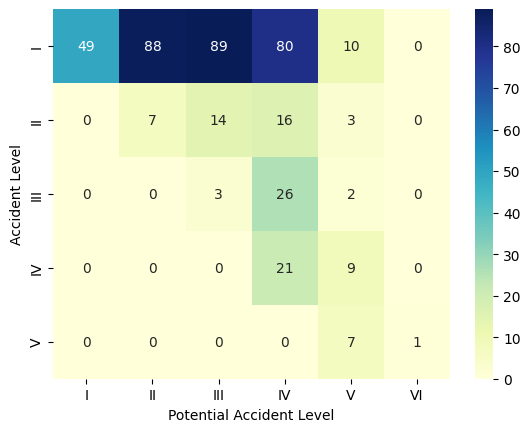

In [39]:
sns.heatmap(pd.crosstab(data['Accident Level'], data['Potential Accident Level']),cmap='YlGnBu', annot=True, fmt="d")

**Observations:**

1. There are 3 contries namely Country_01, Country_02 and Country_03
2. Each country has several Locals.
    
    a. Country_01 has Local_01, Local_03, Local_04, Local_06, Local_11

    b. Country_02 has Local_02, Local_05, Local_07, Local_08, Local_09, Local_12

    c. Country_03 has Local_10

3. Each Location corresponds to different Industry Sector

    Local_01, Local_02, Local_03, Local_04, Local_07 -> Mining sector

    Local_05, Local_06, Local_08, Local_09 -> Metal sector

    Locak_10, Local_11, Local_12 -> Other sector

4. Total accidents for Males = 403 and Females = 22

5. Mining and Metal sectors have accident levels ranging from 1 to 5, other sectors has accident ranging from 1 to 4

6. Males has accident levels ranging from 1 to 5 and Females has accident levels ranging from 1 to 3

7. Employees tend to have less accident level compared to Third Party

8. Most of the Potential Accident levels are very high compared to the present accident levels

In [40]:
# One hot encoding the country
from sklearn.preprocessing import OneHotEncoder

In [53]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[['Countries', 'Local', 'Industry Sector', 'Genre', 'Employee or Third Party']])
encoded_df1 = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Countries','Local', 'Industry Sector', 'Genre', 'Employee or Third Party']))

In [54]:
encoded_df1

,Countries_Country_02,Countries_Country_03,Local_Local_02,Local_Local_03,Local_Local_04,Local_Local_05,Local_Local_06,Local_Local_07,Local_Local_08,Local_Local_09,Local_Local_10,Local_Local_11,Local_Local_12,Industry Sector_Mining,Industry Sector_Others,Genre_Male,Employee or Third Party_Third Party,Employee or Third Party_Third Party (Remote)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
421,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
422,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
423,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
data['Accident Level'].replace({'I':1,'II':2,'III':3,'IV':4,'V':5}, inplace=True)

<ipython-input-58-c5a6ee305de2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Accident Level', 'Potential Accident Level']].replace({'I':1,'II':2,'III':3,'IV':4,'V':5}, inplace=True)


In [59]:
data['Potential Accident Level'].replace({'I':1,'II':2,'III':3,'IV':4,'V':5}, inplace=True)

In [60]:
data.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [70]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
def tokenize(x):
  all_tokens = word_tokenize(x.lower())
  final_tokens = []
  for token in all_tokens:
    if token not in stop_words:
      final_tokens.append(token)
  return final_tokens

In [80]:
data['Tokens'] = data['Description'].apply(lambda x: tokenize(x))

In [81]:
data.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Tokens
0,2016-01-01,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,"[removing, drill, rod, jumbo, 08, maintenance,..."
1,2016-01-02,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,"[activation, sodium, sulphide, pump, ,, piping..."
2,2016-01-06,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,"[sub-station, milpo, located, level, +170, col..."
3,2016-01-08,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,"[9:45, ., approximately, nv, ., 1880, cx-695, ..."
4,2016-01-10,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,"[approximately, 11:45, a.m., circumstances, me..."
